In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
dataset = load_diabetes()

df_diabetes = pd.DataFrame(
    dataset.data,
    columns=dataset.feature_names
)

In [3]:
X = df_diabetes
y = dataset.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10
)

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

In [6]:
dt = DecisionTreeRegressor(random_state=10)

grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

In [7]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [8]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}


In [9]:
best_model = grid.best_estimator_

In [10]:
y_pred = best_model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.31194463712799314
MAE: 52.39672048726095
MSE: 4353.788031426132


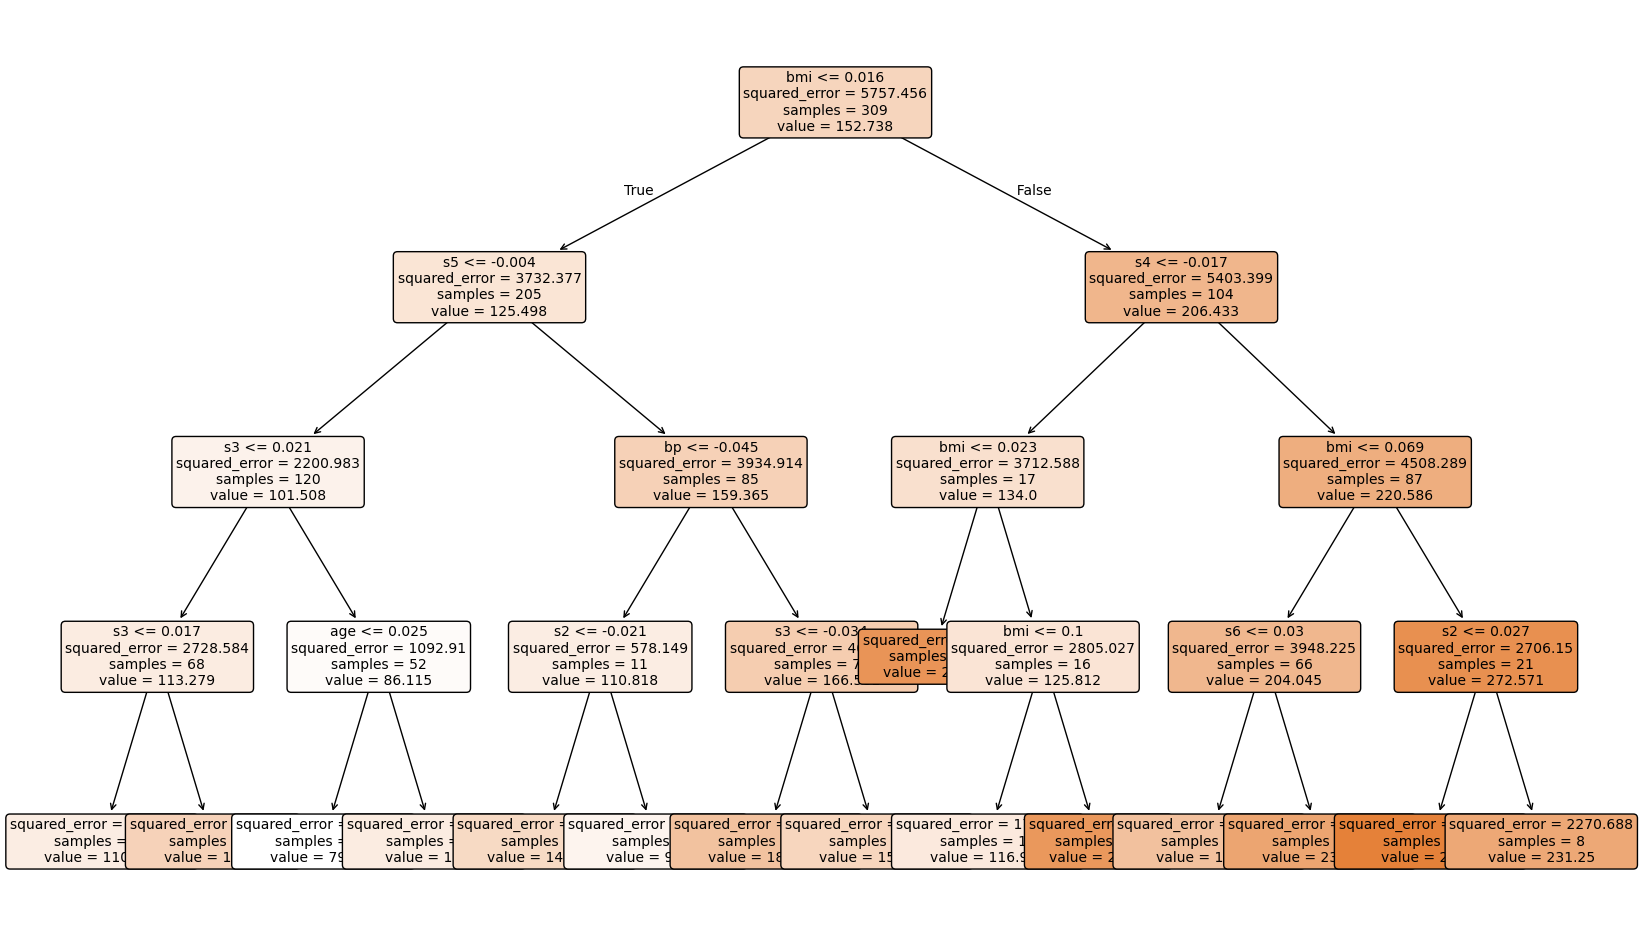

In [12]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 12))
tree.plot_tree(
    best_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()